In [76]:
#importa pandas para usarlo como pd
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [77]:
#recupera el archivo PostA desde hadoop
postQTags = pd.read_csv('PostQTagsIdFiltrado.csv')

In [79]:
# muestra los resultados del DataFrame
postQTags.head(151875)

,Unnamed: 0,Tags,Id
0,0,.net,1
1,1,asp.net-web-api,1
2,2,asp.net,1
3,3,delphi,3
4,4,c++,5
...,...,...,...
151870,151870,inicializacion,431537
151871,151871,android,431599
151872,151872,android-studio,431599
151873,151873,android-layout,431599


In [81]:
postQTags.count()

Unnamed: 0    151875
Tags          151839
Id            151875
dtype: int64

In [82]:
# Ordenar los Tags alfabeticamene y guardarlos para ver los tags Null (NaN)
pqtGB = postQTags.sort_values(by='Tags', ascending=True)
pqtGB.to_csv("PostQTagsOrdenadoXTagFiltrado.csv")

In [84]:
pqtGB.fillna('null', inplace=True)

In [86]:
pqtGB[pqtGB.Tags == 'null'].count()

Unnamed: 0    36
Tags          36
Id            36
dtype: int64

In [98]:
pqtGB[pqtGB.Tags == 'javascript']

,Tags,Usos
1013,javascript,11326


In [87]:
pqtGB = postQTags.groupby(['Tags']).size().reset_index(name='Usos').sort_values(by='Usos', ascending=False)
pqtGB.to_csv("PostQTagsAgrupadoXTagFiltrado.csv")
pqtGB.head(2255)

,Tags,Usos
1013,javascript,11326
1454,php,9799
994,java,7190
885,html,6139
1580,python,5253
...,...,...
283,búsqueda-monte-carlo,1
1967,tcl,1
1966,task-runner,1
478,datos-abiertos,1


In [91]:
#len = cantidad de etiquetas (hay 2689 Tags distintos)
# min = el minimo uso de un tag
# max = el maximo uso de un tag
pqtGB.Usos.agg([len, min, max])

len     2255
min        1
max    11326
Name: Usos, dtype: int64

In [88]:
# count = para cuantos registros aplica
# mean = media
# std = desviación estandar
# min = valor minimo de aparición de un tags
# max = valor maximo de aparición de un tags
# 25% , 50% y 75% son 1º, 2º y 3º cuartil respectivamente.
# el primer 25% de los count tiene 4.
# el 50 % tiene 12 counts
# el 75 % tiene 47 counts

pqtGB.describe()

,Usos
count,2255.000000
mean,67.334368
std,464.989185
min,1.000000
25%,2.000000
50%,6.000000
75%,22.000000
max,11326.000000


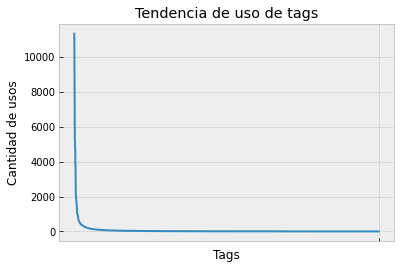

<Figure size 432x288 with 0 Axes>

In [89]:
#p2= pqtGB[0:100]
plt.style.use('bmh')
plt.plot(pqtGB['Tags'], pqtGB['Usos'])
plt.title("Tendencia de uso de tags")
plt.xlabel("Tags")
plt.ylabel('Cantidad de usos')
plt.xticks('')   
plt.show()
#plt.savefig('img1.png')

# Trabajando con una muestra representativa de 100 Tags

In [ ]:
p2= pqtGB[0:100]

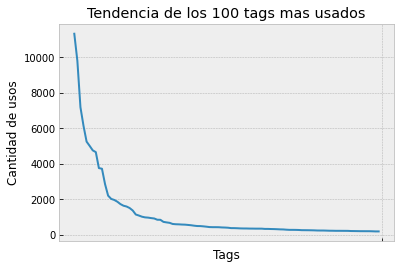

In [93]:
plt.style.use('bmh')
plt.plot(p2['Tags'], p2['Usos'])
plt.title("Tendencia de los 100 tags mas usados")
plt.xlabel("Tags")
plt.ylabel('Cantidad de usos')
plt.xticks('')   
plt.show()

In [94]:
plt.close()

In [ ]:
p3 = p2[0:20]

Text(0, 0.5, 'Volumen de peticiones')

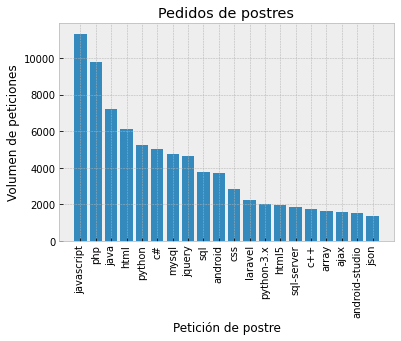

In [110]:
plt.figure()#Figura. Puede incluirse el tamaño con figsize
x= p3['Tags']
y= p3['Usos']
ax = plt.subplot() #Axis
plt.bar(x, y)#El gráfico
plt.title('Muestra de los 20 Tags mas usados')#El título
ax.set_xticks(x)#Eje x
ax.set_xticklabels(x, rotation=90)#Etiquetas del eje x
ax.set_xlabel('Tags')#Nombre del eje x
ax.set_ylabel('Usos')#Nombre del eje y

In [121]:
# Porcentajes respecto del total filtrado


In [ ]:
# Porcentajes respecto del total sobre Tags